# Inspect the output of the nonstationary internal tide spectral parameters

cf `InternalTideClimate/NOTEBOOKS/analyse_suntans_ssh_harmonics.ipynb`

!pip install --user git+https://github.com/tide-itrh/speccy.git

In [1]:
import sfoda.suntans.sunxarray as sxr

import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cmocean import cm
from s3fs import S3FileSystem, S3Map

In [2]:

import nonstat_itides as nsit

In [3]:
# s3login = '/home/mrayson/code/s3.acacia.login'
s3login = '/home/jupyter-mrayson/s3.acacia.login'

with open(s3login) as f:
    lines = f.readlines()

url, key, secret = [ff.strip('\n') for ff in lines[0:3]]
s3 = S3FileSystem(client_kwargs={'endpoint_url':url},
            key=key,
            secret=secret)

In [4]:
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1_v3.nc'
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_v2.nc'
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_S2K1.nc'
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1.nc'
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1_v8.nc' # Good one...
# scenario = 'seasonaltides_etasteric'
# units = 'cm'
# vmax=2.

# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_astrotides_D2D1_eta.nc'
# scenario = 'astrotides_eta'
# units = 'cm'
# vmax=2.

has_gamma=False
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1_eta_window.nc'
# scenario = 'seasonaltides_eta_window'
# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1_eta_fixedgam.nc'
# scenario = 'seasonaltides_eta_fixedgam'
# units = 'cm'
# vmax=2.
# varname = 'eta'

paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1_vc_window.nc'
scenario = 'seasonaltides_vc'
paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1_vc_fixedgam.nc'
scenario = 'seasonaltides_vc_fixedgam'
units='cm s$^{-1}$'
vmax=5.
varname='vc'

# paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1_uc_window.nc'
# scenario = 'seasonaltides_uc'
paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_D2D1_uc_fixedgam.nc'
scenario = 'seasonaltides_uc_fixedgam'
units='cm s$^{-1}$'
vmax=5.
varname='uc'

paramsfile = '../DATA/NWS_2km_GLORYS_nonstat_itide_params_seasonaltides_meso_fD2D1_vc.nc'
scenario = 'seasonaltides_meso_fD2D1_vc'
units='cm s$^{-1}$'
vmax=5.
varname='uc'



In [5]:
# f = S3Map("uwaoceanprocesses-suntans/"+paramsfile, s3=s3)
# ds_params = xr.open_dataset(f, engine='zarr', chunks={}, consolidated=False)

ds_params = xr.open_dataset(paramsfile, engine='h5netcdf')
# ds_params = xr.open_dataset(paramsfile, engine='zarr')

# These need filling in??
ds_params.suntans.xv=ds_params.xv.values
ds_params.suntans.yv=ds_params.yv.values

ds_params

Changing the _FillValue from -999999 to 999999


<xarray.Dataset>
Dimensions:    (Nc: 225368, numsides: 8, params: 9, Nk: 80, time: 8761,
                Np: 454016)
Coordinates:
  * time       (time) datetime64[ns] 2013-07-01T00:01:00 ... 2014-07-01
    z_r        (Nk) float64 ...
Dimensions without coordinates: Nc, numsides, params, Nk, Np
Data variables:
    cells      (Nc, numsides) int32 3058 3061 3060 2801 ... 316184 316187 -1 -1
    data       (Nc, params) float64 ...
    dv         (Nc) float64 ...
    dz         (Nk) float64 ...
    f_cpd_inv  (Nc) float32 ...
    nfaces     (Nc) int32 6 6 6 6 6 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6 6 6 6 6 6
    xp         (Np) float64 125.2 114.2 136.3 125.4 ... 117.0 117.0 117.1 117.1
    xv         (Nc) float64 109.0 109.1 109.1 109.2 ... 117.7 117.7 117.7 117.9
    yp         (Np) float64 -14.48 -22.48 -13.24 -14.54 ... -18.27 -18.27 -18.26
    yv         (Nc) float64 -19.4 -19.5 -19.61 -19.71 ... -13.1 -13.12 -13.07
Attributes:
    Author:       mrayson
    Description:  SUNTANS surface fields

In [6]:
datafile = ds_params['data'].attrs['input file']
datafile

'NWS_2km_GLORYS_2013_2014_vc_seasonaltides.zarr'

In [7]:
f = S3Map("uwaoceanprocesses-suntans/"+datafile, s3=s3)
ds_data = xr.open_dataset(f, engine='zarr', chunks={}, consolidated=False)

# These need filling in??
ds_data.suntans.xv=ds_data.xv.values
ds_data.suntans.yv=ds_data.yv.values

ds_data

Changing the _FillValue from -999999 to 999999


<xarray.Dataset>
Dimensions:              (Nc: 225368, numsides: 8, Nk: 80, time: 8761,
                          Np: 454016)
Coordinates:
  * time                 (time) datetime64[ns] 2013-07-01T00:01:00 ... 2014-0...
    z_r                  (Nk) float64 dask.array<chunksize=(80,), meta=np.ndarray>
Dimensions without coordinates: Nc, numsides, Nk, Np
Data variables:
    cells                (Nc, numsides) int32 dask.array<chunksize=(2000, 8), meta=np.ndarray>
    dv                   (Nc) float64 dask.array<chunksize=(2000,), meta=np.ndarray>
    dz                   (Nk) float64 dask.array<chunksize=(80,), meta=np.ndarray>
    nfaces               (Nc) int32 dask.array<chunksize=(2000,), meta=np.ndarray>
    vc_non_phase_locked  (time, Nc) float64 dask.array<chunksize=(8761, 2000), meta=np.ndarray>
    vc_phase_locked      (time, Nc) float64 dask.array<chunksize=(8761, 2000), meta=np.ndarray>
    xp                   (Np) float64 dask.array<chunksize=(454016,), meta=np.ndarray>
    xv                   (Nc) float64 dask.array<chunksize=(2000,), meta=np.ndarray>
    yp                   (Np) float64 dask.array<chunksize=(454016,), meta=np.ndarray>
    yv                   (Nc) float64 dask.array<chunksize=(2000,), meta=np.ndarray>
Attributes:
    Author:       mrayson
    Description:  SUNTANS surface fields

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [116]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='large'
plt.rcParams['pcolor.shading']='auto'

In [138]:
# Regional plots
def plot_contours(ds):
    return ds.suntans.contourf(ds.dv, [200,1000], 
                           colors='k', 
                           linewidths=0.5, 
                           filled=False, colorbar=False)


def add_colorbar(ax, cc, vmin, vmax, titlestr):
    font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 12,
        }
    #cbaxes = inset_axes(ax, width="30%", height="3%", loc='lower right', bbox_to_anchor=(0, 0.1, 1, 1),
    #                       bbox_transform=ax.transAxes)
    #cb=plt.colorbar(cc, orientation='horizontal', cax=cbaxes)
    cb=plt.colorbar(cc, ax=ax, orientation='horizontal', shrink=0.3, pad=-0.1, )

    cb.set_ticks([vmin,vmax])
    cb.ax.set_title(titlestr, fontdict=font)

    return cb
        
def plot_params(ds_params, xlim, ylim, vmax, units, idx=[5,6,7,8]):
    fig = plt.figure(figsize=(11,8))

    ax1=plt.subplot(221, facecolor='0.5')
    _,_,cc,_ = ds_params.suntans.plotcelldata(ds_params['data'].isel(params=idx[0])*100,
                                              colorbar=False, cmap='Reds', vmin=0,vmax=vmax)
    plot_contours(ds_params)
    #plt.title('Incoherent D2 amplitude [{}]'.format(units))
    add_colorbar(ax1, cc, 0, vmax, r'$\eta D2$ [{}]'.format(units))
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    ax1.set_xticklabels([])
    #plt.xlabel('Longitude [$^{\circ}$E]')
    plt.ylabel('Latitude [$^{\circ}$N]')  
    
    ax2=plt.subplot(222, facecolor='0.5')
    _,_,cc,_ = ds_params.suntans.plotcelldata(ds_params['data'].isel(params=idx[1]), 
                                              colorbar=False, cmap='viridis', vmin=0, vmax=10)
    plot_contours(ds_params)
    #plt.title('Incoherent D2 decay time scale [days]')
    add_colorbar(ax2, cc, 0, 10, r'$\tau D2$ [{}]'.format('days'))

    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])

    ax3=plt.subplot(223, facecolor='0.5')
    _,_,cc,_ = ds_params.suntans.plotcelldata(ds_params['data'].isel(params=idx[2])*100, 
                                              colorbar=False, cmap='Reds', vmin=0,vmax=vmax)
    plot_contours(ds_params)
    #plt.title('Incoherent D1 amplitude [{}]'.format(units))
    add_colorbar(ax3, cc, 0, vmax, r'$\eta D1$ [{}]'.format(units))

    ax3.set_xlim(xlim)
    ax3.set_ylim(ylim)
    plt.xlabel('Longitude [$^{\circ}$E]')
    plt.ylabel('Latitude [$^{\circ}$N]')  

    ax4=plt.subplot(224, facecolor='0.5')
    _,_,cc,_ = ds_params.suntans.plotcelldata(ds_params['data'].isel(params=idx[3]), 
                                              colorbar=False, cmap='viridis', vmin=0, vmax=10)
    plot_contours(ds_params)
    #plt.title('Incoherent D1 decay time scale [days]')
    add_colorbar(ax4, cc, 0, 10, r'$\tau D1$ [{}]'.format('days'))

    ax4.set_xlim(xlim)
    ax4.set_ylim(ylim)
    ax4.set_yticklabels([])
    plt.xlabel('Longitude [$^{\circ}$E]')
    #plt.ylabel('Latitude [$^{\circ}$N]')  

    plt.tight_layout()
    return ax1, ax2, ax3, ax4


    
def plot_gamma(ds_params, xlim, ylim):
    fig = plt.figure(figsize=(10,4))

    ax1=plt.subplot(121, facecolor='0.5')
    ds_params.suntans.plotcelldata(ds_params['data'].isel(params=4), cmap='Blues', vmin=1,vmax=2)
    plot_contours(ds_params)
    plt.title('D2 $\gamma$ parameter')
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    #ax1.set_xticklabels([])
    
    ax2=plt.subplot(122, facecolor='0.5')
    ds_params.suntans.plotcelldata(ds_params['data'].isel(params=5), cmap='Blues', vmin=1,vmax=2)
    plot_contours(ds_params)
    plt.title('D1 $\gamma$ parameter')
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    ax2.set_yticklabels([])
    #ax2.set_xticklabels([])

# Regional plots

def plot_meso_params(ds_params, xlim, ylim, vmax, units, idx=[0,1,2]):
    fig = plt.figure(figsize=(10,4))

    ax1=plt.subplot(131, facecolor='0.5')
    _,_,cc,_ = ds_params.suntans.plotcelldata(ds_params['data'].isel(params=idx[0])*100, 
                                   colorbar=False, cmap='Reds', vmin=0,vmax=25.)
    plot_contours(ds_params)
    add_colorbar(ax1, cc, 0, 25, r'$\eta_m$ [{}]'.format(units))
    #plt.title('Mesoscale amplitude [{}]'.format(units))
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    # ax1.set_xticklabels([])
    plt.xlabel('Longitude [$^{\circ}$E]')
    plt.ylabel('Latitude [$^{\circ}$N]')  
    
    ax2=plt.subplot(132, facecolor='0.5')
    _,_,cc,_ = ds_params.suntans.plotcelldata(ds_params['data'].isel(params=idx[1]),
                                   colorbar=False, cmap='viridis', vmin=0, vmax=20)
    plot_contours(ds_params)
    add_colorbar(ax2, cc, 0, 20, r'$\tau_m$ [{}]'.format('days'))
    #plt.title('Mesoscale decay time scale [days]')
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    ax2.set_yticklabels([])
    plt.xlabel('Longitude [$^{\circ}$E]')
    #plt.ylabel('Latitude [$^{\circ}$N]')  

    ax3=plt.subplot(133, facecolor='0.5')
    _,_,cc,_ = ds_params.suntans.plotcelldata(ds_params['data'].isel(params=idx[2]), 
                                   colorbar=False, cmap='Blues', vmin=0,vmax=2)
    plot_contours(ds_params)
    add_colorbar(ax3, cc, 0, 2, r'$\gamma_m$')
    #plt.title('Mesoscale gamma')
    ax3.set_xlim(xlim)
    ax3.set_ylim(ylim)
    ax3.set_yticklabels([])
    plt.xlabel('Longitude [$^{\circ}$E]')
    #plt.ylabel('Latitude [$^{\circ}$N]')  

    plt.tight_layout()
    return ax1, ax2, ax3

def plot_f_params(ds_params, xlim, ylim, vmax, units, idx=[3,4]):
    fig = plt.figure(figsize=(10,4))

    ax1=plt.subplot(121, facecolor='0.5')
    _,_,cc,_ = ds_params.suntans.plotcelldata(ds_params['data'].isel(params=idx[0])*100, 
                                              cmap='Reds', vmin=0,vmax=vmax, colorbar=False)
    plot_contours(ds_params)
    add_colorbar(ax1, cc, 0, vmax, r'$\eta_f$ [{}]'.format(units))
    #plt.title('Incoherent f amplitude [{}]'.format(units))
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    #ax1.set_xticklabels([])
    plt.xlabel('Longitude [$^{\circ}$E]')
    plt.ylabel('Latitude [$^{\circ}$N]')  

    
    ax2=plt.subplot(122, facecolor='0.5')
    _,_,cc,_ =ds_params.suntans.plotcelldata(ds_params['data'].isel(params=idx[1]),\
                cmap='viridis', vmin=0, vmax=10, colorbar=False)

    plot_contours(ds_params)
    add_colorbar(ax2, cc, 0, 10, r'$\tau_f$ [days]')
    #plt.title('Incoherent f decay time scale [days]')
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    ax2.set_yticklabels([])
    #ax2.set_xticklabels([])
    plt.xlabel('Longitude [$^{\circ}$E]')


    plt.tight_layout()
    return ax1, ax2


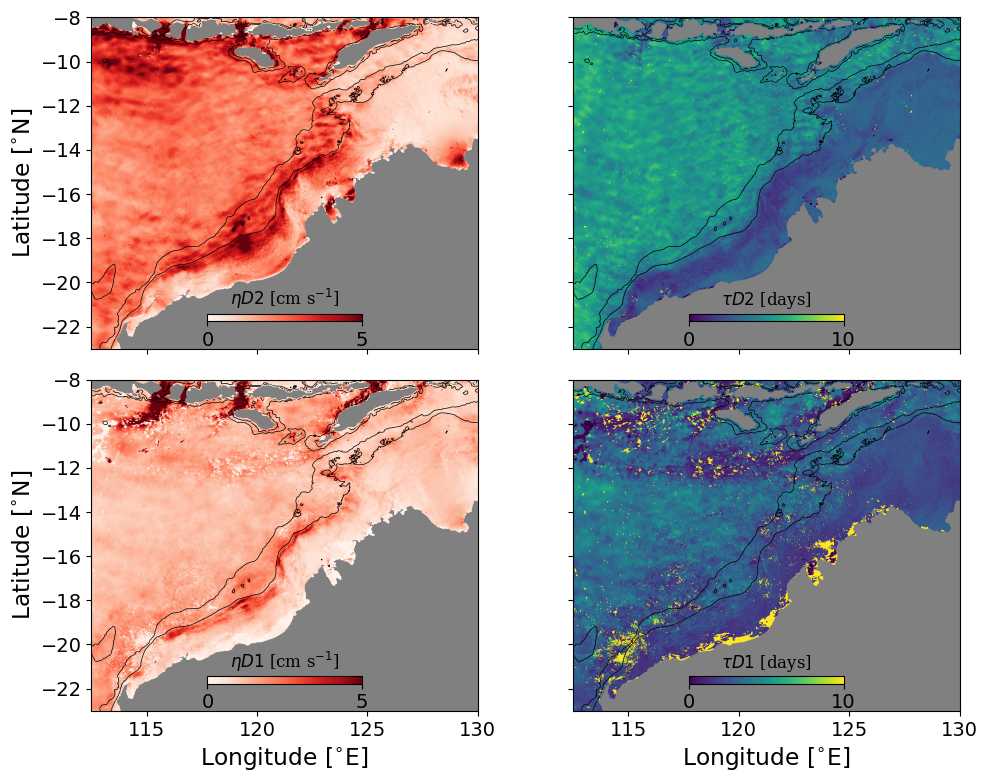

In [135]:
xlim = 112.5, 130
ylim = -23, -8
plot_params(ds_params, xlim, ylim, vmax, units)
plt.savefig('../FIGURES/suntans_ic_itide_params_{}.png'.format(scenario),dpi=150)

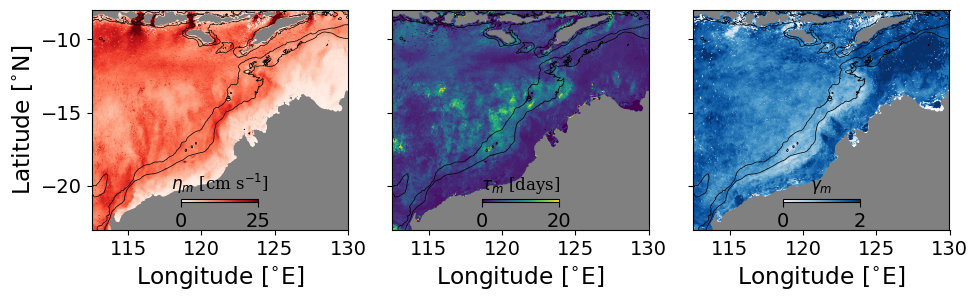

In [139]:
xlim = 112.5, 130
ylim = -23, -8
plot_meso_params(ds_params, xlim, ylim, vmax, units)
plt.savefig('../FIGURES/suntans_ic_itide_meso_params_{}.png'.format(scenario),dpi=150)

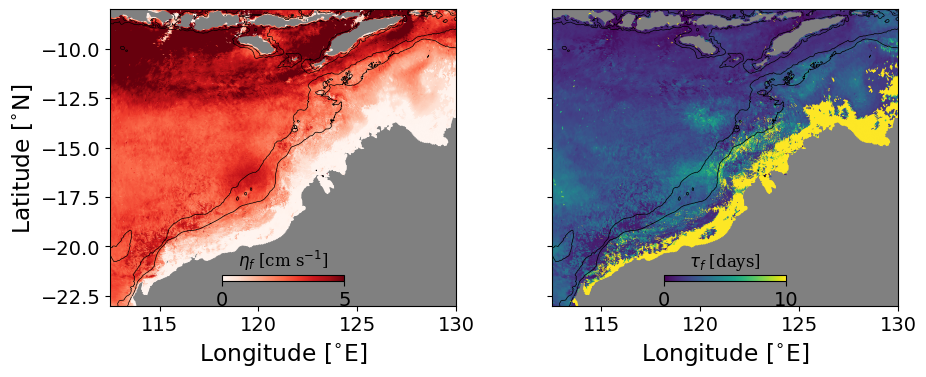

In [117]:
xlim = 112.5, 130
ylim = -23, -8
plot_f_params(ds_params, xlim, ylim, vmax, units)
plt.savefig('../FIGURES/suntans_ic_itide_f_params_{}.png'.format(scenario),dpi=150)

(<Figure size 640x480 with 1 Axes>,
 <Axes: >,
 None)

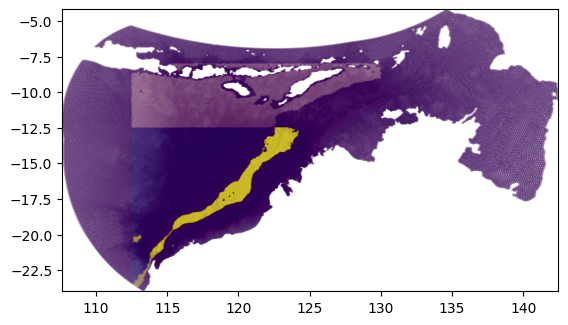

In [65]:
# Histograms of parameters in different regions

# Lower basin
regionA = (ds_params.suntans.xv>112.5) & (ds_params.suntans.xv<130.) &\
    (ds_params.suntans.yv<-12.5) & (ds_params.dv>900)

# NWS
regionB = (ds_params.suntans.xv>112.5) & (ds_params.suntans.xv<130.) &\
    (ds_params.suntans.yv<-12.5) & (ds_params.dv<900) & (ds_params.dv>200)

# Upper basin
regionC = (ds_params.suntans.xv>112.5) & (ds_params.suntans.xv<130.) &\
    (ds_params.suntans.yv>-12.5) & (ds_params.suntans.yv<-8.0) & (ds_params.dv>900)

ds_params.suntans.plotcelldata(regionA, alpha=0.1, cmap='RdBu',colorbar=False)
ds_params.suntans.plotcelldata(regionC, alpha=0.1, cmap='gist_ncar',colorbar=False)
ds_params.suntans.plotcelldata(regionB, alpha=0.1, colorbar=False)



In [40]:
ds_params['data']

<xarray.DataArray 'data' (Nc: 225368, params: 9)>
[2028312 values with dtype=float64]
Dimensions without coordinates: Nc, params
Attributes:
    covariance function:  itide_fD2D1_meso_gammaexp
    input file:           NWS_2km_GLORYS_2013_2014_vc_seasonaltides.zarr
    location:             face
    long_name:            Estimated covariance model parameters
    parameter names:      ['η_m', 'τ_m', 'γ_m', 'η_f', 'τ_f', 'η_D2', 'τ_D2',...

In [60]:
def calc_stats(ds, param_idx, region):
    data = ds['data'].isel(params=param_idx).values[region]
    #ff = [np.nanmean(data), np.nanstd(data)]
    ff = [np.nanpercentile(data,50), np.nanpercentile(data,90)]
    return f"{ff[0]:3.2f} ({ff[1]:3.2f})"

mystrA = 'A '
for ii in range(9):
    mystrA += '| ' + calc_stats(ds_params, ii, regionA) 

mystrB = 'B '
for ii in range(9):
    mystrB += '| ' + calc_stats(ds_params, ii, regionB) 

mystrC = 'C '
for ii in range(9):
    mystrC += '| ' + calc_stats(ds_params, ii, regionC) 

print(ds_params['data'].attrs['parameter names'])
print(mystrA)
print(mystrB)
print(mystrC)

['η_m', 'τ_m', 'γ_m', 'η_f', 'τ_f', 'η_D2', 'τ_D2', 'η_D1', 'τ_D1']
A | 0.12 (0.15)| 5.28 (10.04)| 1.29 (1.57)| 0.03 (0.04)| 2.60 (3.90)| 0.02 (0.03)| 5.34 (6.11)| 0.01 (0.02)| 3.27 (4.46)
B | 0.12 (0.15)| 6.83 (10.23)| 0.98 (1.29)| 0.03 (0.04)| 2.91 (4.95)| 0.03 (0.04)| 4.42 (5.43)| 0.02 (0.02)| 3.00 (4.59)
C | 0.13 (0.17)| 4.20 (6.38)| 1.49 (1.81)| 0.04 (0.06)| 1.47 (2.05)| 0.02 (0.04)| 5.13 (6.01)| 0.01 (0.02)| 2.71 (4.49)


Table Caption: Median values and 90th percentile shown in brackets
region | η_m [m/s]| τ_m [d] | γ_m | η_f [m/s]| τ_f [d]| η_D2 [m/s]| τ_D2 [d]| η_D1 [m/s]| τ_D1 [d]
-------|------|------|------|------|------|-------|-------|-------|-------
A | 0.12 (0.15)| 5.28 (10.04)| 1.29 (1.57)| 0.03 (0.04)| 2.60 (3.90)| 0.02 (0.03)| 5.34 (6.11)| 0.01 (0.02)| 3.27 (4.46)
B | 0.12 (0.15)| 6.83 (10.23)| 0.98 (1.29)| 0.03 (0.04)| 2.91 (4.95)| 0.03 (0.04)| 4.42 (5.43)| 0.02 (0.02)| 3.00 (4.59)
C | 0.13 (0.17)| 4.20 (6.38)| 1.49 (1.81)| 0.04 (0.06)| 1.47 (2.05)| 0.02 (0.04)| 5.13 (6.01)| 0.01 (0.02)| 2.71 (4.49)

In [44]:
if has_gamma:
    xlim = 108, 130
    ylim = -23, -8
    plot_gamma(ds_params, xlim, ylim)
    plt.savefig('../FIGURES/suntans_ic_itide_gammaparams_{}.png'.format(scenario),dpi=150)

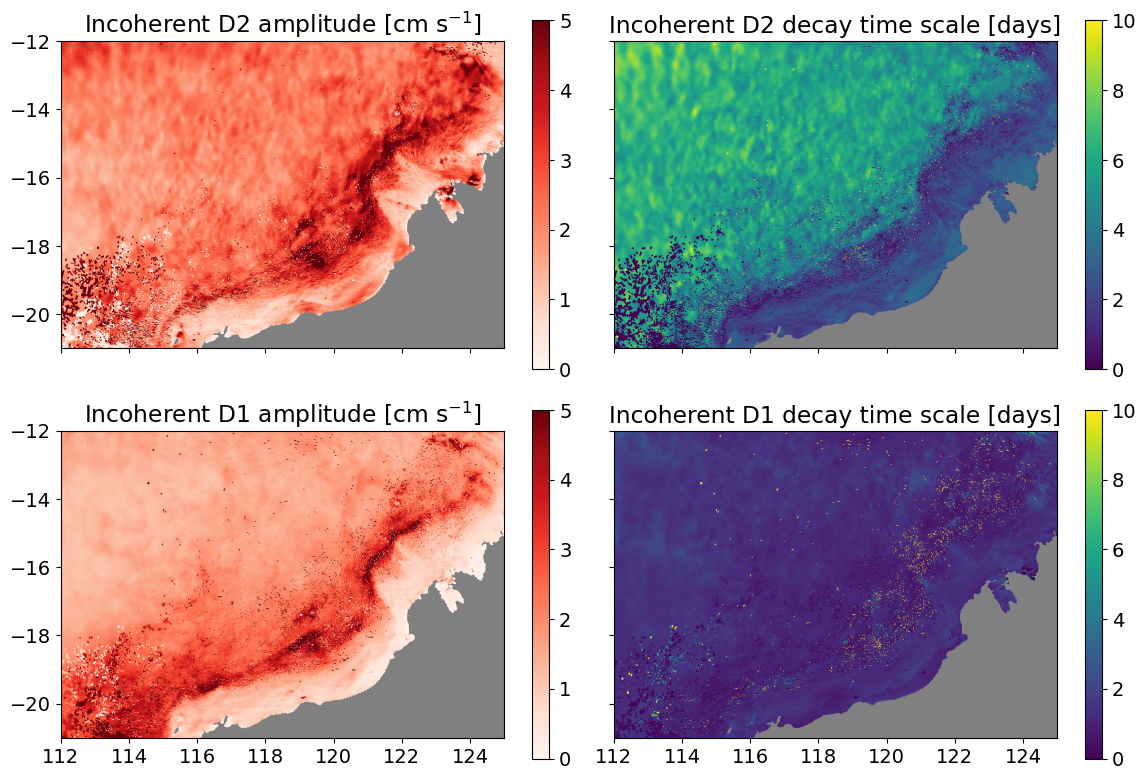

In [45]:
# NWSregion
xlim = 112, 125
ylim = -21, -12
plot_params(ds_params, xlim, ylim, vmax, units)

if has_gamma:
    plot_gamma(ds_params, xlim, ylim)

In [46]:
acffunc = getattr(nsit, ds_params['data'].attrs['covariance function'])
acffunc

<function nonstat_itides.oscillate_D2D1_gammaexp_fixed(x, xpr, params, lt=[0.5087625254259195, 1.0365377358479884], gam1=1.5, gam2=1.5)>

In [47]:
# Do a spectral plot
from scipy.signal.windows import hann

def plot_site(xpt, ypt, c='k'):
    data_pt = nsit.extract_point(ds_data, xpt, ypt)
    tdays = (data_pt.time-data_pt.time[0]).values.astype(float)/1e9/86400
    dt = tdays[1]-tdays[0]
    params_pt = nsit.extract_point(ds_params, xpt, ypt)
    acf = acffunc(tdays, tdays[0], [ff for ff in params_pt['data'].data])

    #y = data_pt['eta_steric_non_phase_locked']
    #y = data_pt['eta_non_phase_locked']+data_pt['eta_phase_locked']
    y = data_pt['{}_non_phase_locked'.format(varname)]
    #y = data_pt['uc_non_phase_locked']

    #window=None
    window=hann(y.shape[0])
    
    f, I =  nsit.periodogram(y, delta=dt, h=None)
    f, I2 =  nsit.periodogram(y, delta=dt, h=window)
    #f, I2 =  nsit.periodogram(y2, delta=dt)
    f_S, S = nsit.bochner(acf, delta=dt)
    plt.figure()
    ax=plt.subplot(111)
    plt.semilogy(f, 2*I2, c, lw=0.2)
    #plt.semilogy(f, I2, 'b', lw=0.2)
    plt.semilogy(f_S,S,c, ls='--', lw=2)
    ax.set_ylim(1e-9, 1e-1)
    plt.xlim(0.8, 2.4)
    #plt.xlim(0.1, 6)
    
    plt.xlabel('f [cpd]')
    
    #print(np.exp(params_pt['data'][0:4].data))
    #print(np.exp(params_pt['data'][-1].data))
    #print(nsit.invlogit(params_pt['data'][4:6].data, scale=2))
    print(params_pt['data'].values)


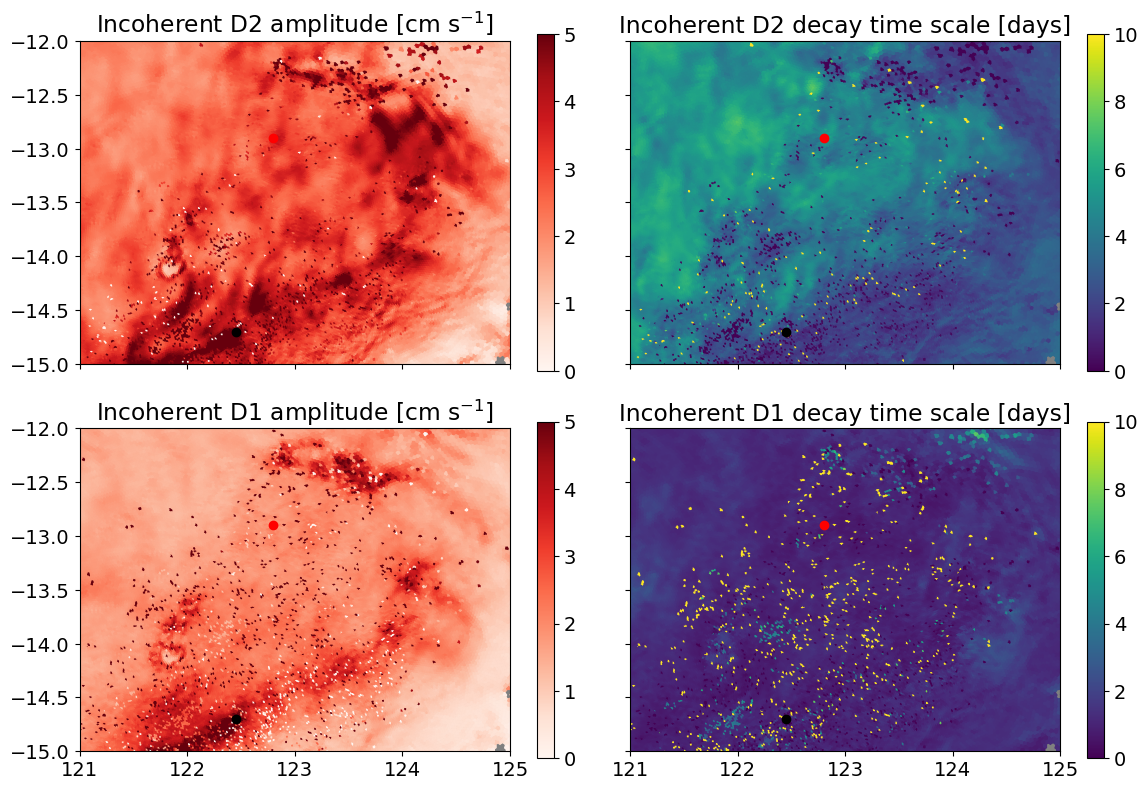

In [48]:
# Shelf region
xlim = 121, 125
ylim = -15, -12
ax1,ax2,ax3,ax4 = plot_params(ds_params, xlim, ylim, vmax, units)

xpt1, ypt1 = 122.8,-12.9
# xpt2, ypt2 = 122.0,-12.9
# xpt2, ypt2 = 123.1,-12.9
xpt2, ypt2 = 122.45,-14.7

ax1.plot(xpt1,ypt1,'ro')
ax2.plot(xpt1,ypt1,'ro')
ax3.plot(xpt1,ypt1,'ro')
ax4.plot(xpt1,ypt1,'ro')
ax1.plot(xpt2,ypt2,'ko')
ax2.plot(xpt2,ypt2,'ko')
ax3.plot(xpt2,ypt2,'ko')
ax4.plot(xpt2,ypt2,'ko')

location='Browse'
plt.savefig('../FIGURES/suntans_ic_itide_zoom_{}_{}.png'.format(location, scenario),dpi=150)

[3.93403022e-02 4.70987658e+00 2.15532913e-02 9.03811545e-01
 1.00000000e-15]
[5.00315332e-02 2.14859810e+00 5.61261052e-02 5.53415789e-01
 2.72984124e-15]


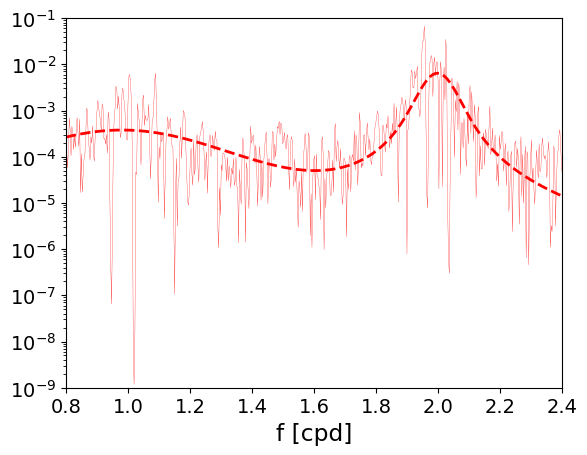

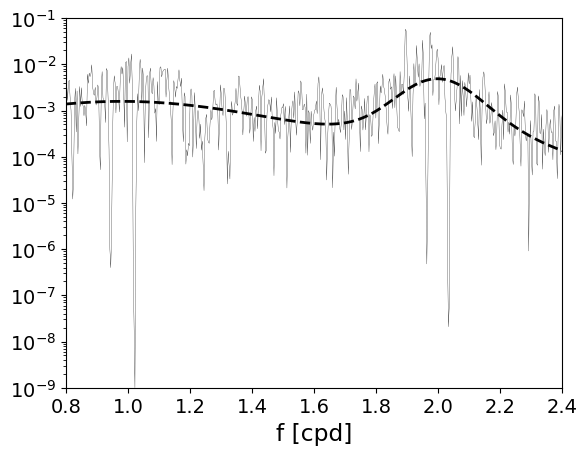

In [49]:
plot_site(xpt1, ypt1, c='r')
plt.savefig('../FIGURES/suntans_ic_{}_{}_redspecta.png'.format(location, scenario),dpi=150)
plot_site(xpt2, ypt2, c='k')
plt.savefig('../FIGURES/suntans_ic_{}_{}_blackspecta.png'.format(location, scenario),dpi=150)


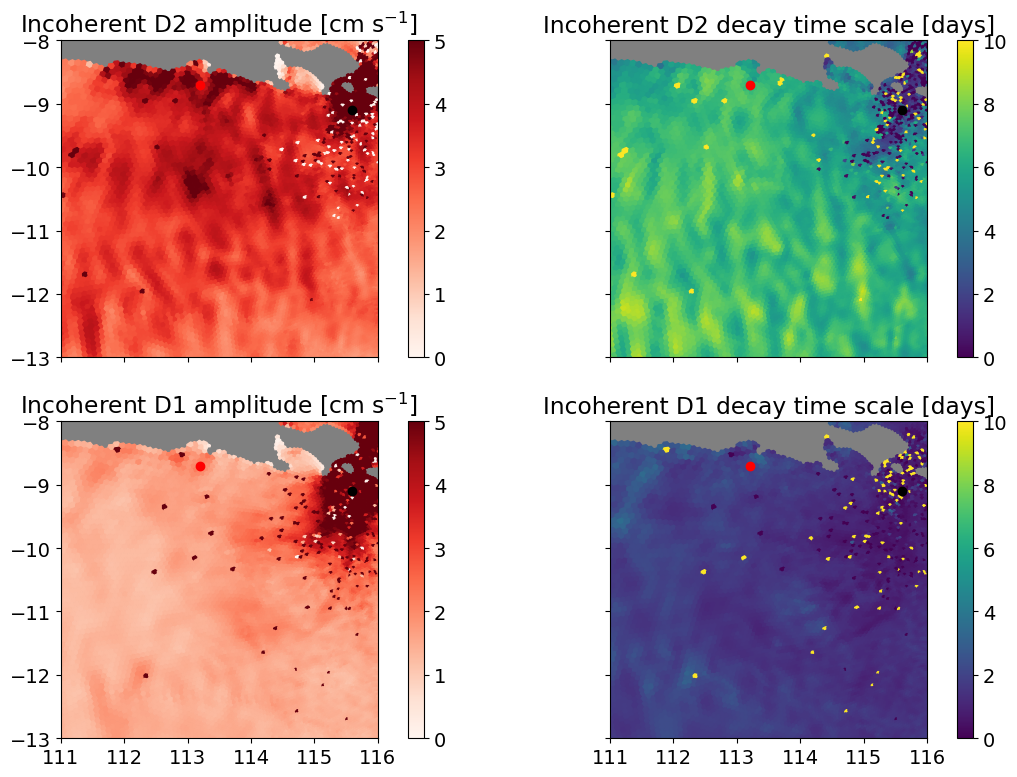

In [50]:
# ITF region
xlim = 111, 116
ylim = -13, -8
ax1, ax2,ax3, ax4=plot_params(ds_params, xlim, ylim, vmax, units)

xpt1, ypt1 = 113.2,-8.7
xpt2, ypt2 = 115.6,-9.1

ax1.plot(xpt1,ypt1,'ro')
ax2.plot(xpt1,ypt1,'ro')
ax3.plot(xpt1,ypt1,'ro')
ax4.plot(xpt1,ypt1,'ro')
ax1.plot(xpt2,ypt2,'ko')
ax2.plot(xpt2,ypt2,'ko')
ax3.plot(xpt2,ypt2,'ko')
ax4.plot(xpt2,ypt2,'ko')

location='Lombok'
plt.savefig('../FIGURES/suntans_ic_itide_zoom_{}_{}.png'.format(location, scenario),dpi=150)

[3.79044128e-02 6.44265597e+00 2.06856184e-02 2.20638255e+00
 1.00127403e-15]
[2.73350911e-01 9.85607777e-02 3.57295541e-02 1.21722525e+01
 1.00000000e-15]


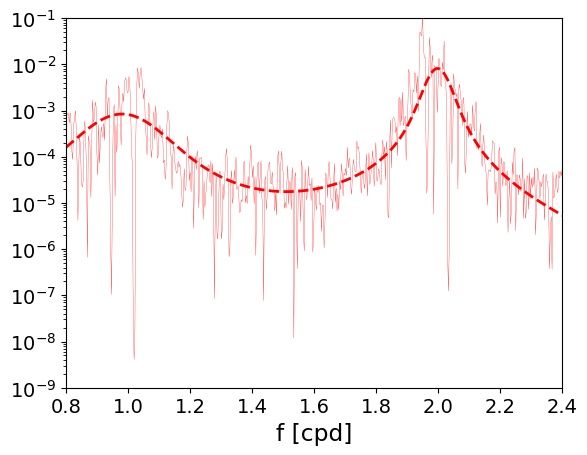

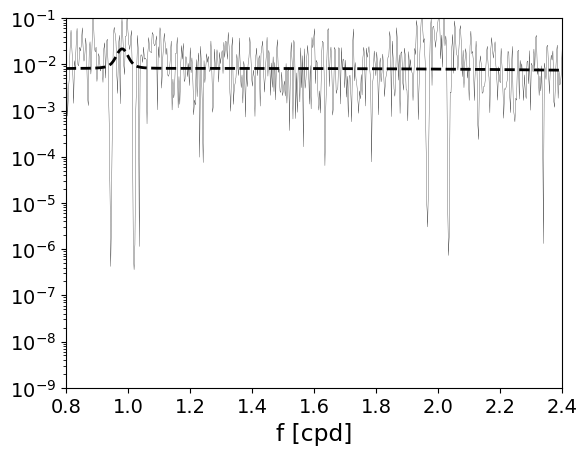

In [51]:
plot_site(xpt1, ypt1, c='r')
plt.savefig('../FIGURES/suntans_ic_{}_{}_redspecta.png'.format(location, scenario),dpi=150)

plot_site(xpt2, ypt2, c='k')
plt.savefig('../FIGURES/suntans_ic_{}_{}_blackspecta.png'.format(location, scenario),dpi=150)


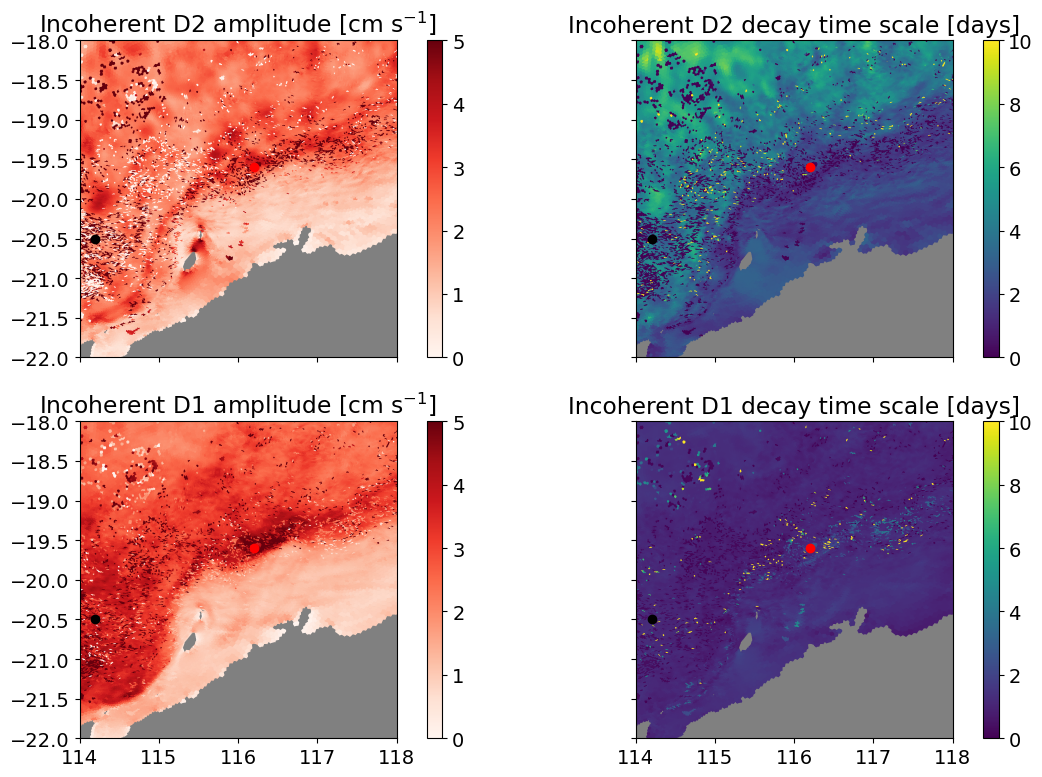

In [54]:
# NWS region
xlim = 114, 118
ylim = -22, -18
ax1, ax2,ax3, ax4=plot_params(ds_params, xlim, ylim, vmax, units)

xpt1, ypt1 = 116.2,-19.6
xpt2, ypt2 = 114.2,-20.5

ax1.plot(xpt1,ypt1,'ro')
ax2.plot(xpt1,ypt1,'ro')
ax3.plot(xpt1,ypt1,'ro')
ax4.plot(xpt1,ypt1,'ro')
ax1.plot(xpt2,ypt2,'ko')
ax2.plot(xpt2,ypt2,'ko')
ax3.plot(xpt2,ypt2,'ko')
ax4.plot(xpt2,ypt2,'ko')

location='NWS'
plt.savefig('../FIGURES/suntans_ic_itide_zoom_{}_{}.png'.format(location, scenario),dpi=150)

[3.46763866e-02 2.50822274e+00 5.18130805e-02 1.41459808e+00
 1.00000000e-15]
[6.98115177e-02 5.82408199e-03 3.02184952e-02 1.21394348e+00
 2.21697603e-15]


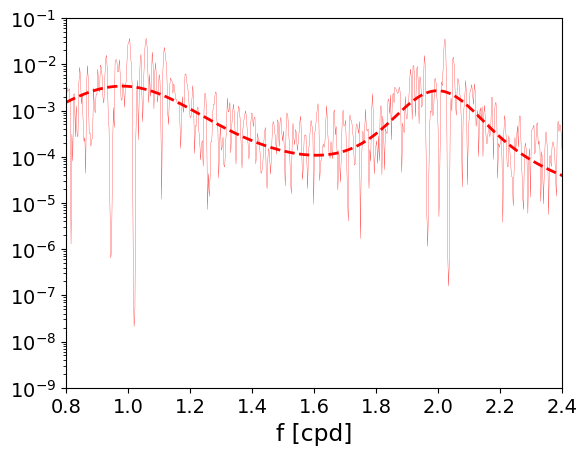

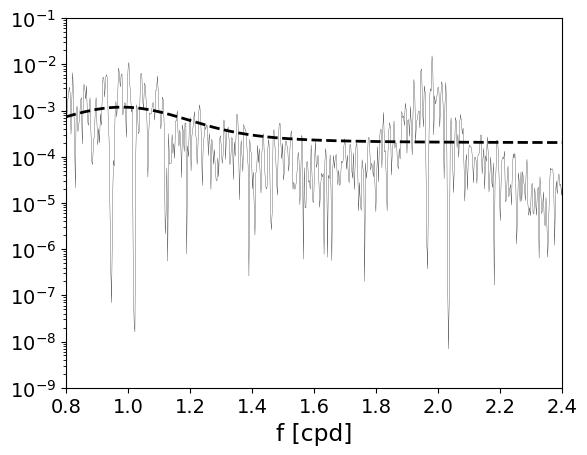

In [55]:
plot_site(xpt1, ypt1, c='r')
plt.savefig('../FIGURES/suntans_ic_{}_{}_redspecta.png'.format(location, scenario),dpi=150)

plot_site(xpt2, ypt2, c='k')
plt.savefig('../FIGURES/suntans_ic_{}_{}_blackspecta.png'.format(location, scenario),dpi=150)
